In [1]:
"""Analysis of results generated by the iterative round testing script"""

from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from core.core import decode_filename, save_plot, analysis_filename, ImageFormat

In [4]:
basic = [
    "iterative_round_results_basic_j12_s2_0",
    "iterative_round_results_basic_j15_s2_0",
    "iterative_round_results_basic_j15_s3_0",
    "iterative_round_results_basic_j25_s5_0"
]

paper = [
    "round_num_fog_j15_s3_0"
]

In [14]:
encoded_filenames = paper
folder = 'paper'
x_axis = 'Total Money'
title = '{} of basic model'.format(x_axis)

In [16]:
data = []
test_name: str = ""

for encoded_filename in encoded_filenames:
    filename, model_name, test_name = decode_filename(folder, encoded_filename)
    with open(filename) as file:
        file_data = json.load(file)
        for pos, model_result in enumerate(file_data):
            if len(model_result) > 15:
                max_iterations = max(r['total_iterations'] for r in model_result.values())
                max_money = max(r['total money'] for r in model_result.values())
                for name, result in model_result.items():
                    data.append([pos, model_name, name, result['initial_cost'], result['price_change'],
                                 result['total_iterations'], result['total_messages'], result['total money'],
                                 max_iterations / result['total_iterations'], result['total money'] / max_money,
                                 result['sum value']])

df = pd.DataFrame(data, columns=["Pos", "Model Name", "Algorithm Name", "Initial cost", 
                                 "Price Change", "Total Iterations", "Total Messages", "Total Money", 
                                 "Total Iterations Speed", "Percent Total Money", "Sum Value"])
df

,Pos,Model Name,Algorithm Name,Initial cost,Price Change,Total Iterations,Total Messages,Total Money,Total Iterations Speed,Percent Total Money,Sum Value
0,0,Jobs: 15 Servers: 3,Initial Cost 0 Price Change 1,0,1,415,3301,523,1.000000,0.950909,711
1,0,Jobs: 15 Servers: 3,Initial Cost 0 Price Change 2,0,2,211,1669,522,1.966825,0.949091,711
2,0,Jobs: 15 Servers: 3,Initial Cost 0 Price Change 5,0,5,92,717,550,4.510870,1.000000,705
3,0,Jobs: 15 Servers: 3,Initial Cost 0 Price Change 8,0,8,55,421,512,7.545455,0.930909,705
4,0,Jobs: 15 Servers: 3,Initial Cost 0 Price Change 10,0,10,48,365,540,8.645833,0.981818,706
5,0,Jobs: 15 Servers: 3,Initial Cost 5 Price Change 1,5,1,360,2861,518,1.152778,0.941818,711
6,0,Jobs: 15 Servers: 3,Initial Cost 5 Price Change 2,5,2,187,1477,509,2.219251,0.925455,711
7,0,Jobs: 15 Servers: 3,Initial Cost 5 Price Change 5,5,5,86,669,510,4.825581,0.927273,711
8,0,Jobs: 15 Servers: 3,Initial Cost 5 Price Change 8,5,8,57,437,528,7.280702,0.960000,711
9,0,Jobs: 15 Servers: 3,Initial Cost 5 Price Change 10,5,10,46,349,500,9.021739,0.909091,711


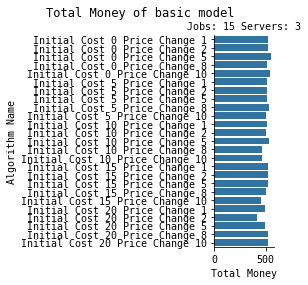

In [15]:
g = sns.FacetGrid(df, col='Model Name', sharex=False, height=4)
g = g.map(sns.barplot, x_axis, "Algorithm Name").set_titles("{col_name}")

g.fig.subplots_adjust(top=0.88)
g.fig.suptitle(title)

g

Save file location: ../figures/iterative_round/png/all_round_num_heat.png
Save file location: ../figures/iterative_round/eps/all_round_num_heat.eps


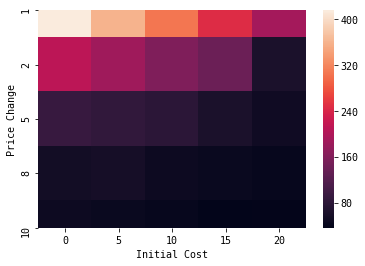

In [9]:
datamap = pd.DataFrame([(price_change, initial_cost, 
                         np.mean(df[(df['Initial cost'] == initial_cost) & 
                                    (df['Price Change'] == price_change)]['Total Iterations']))
    for initial_cost in df['Initial cost'].unique()
    for price_change in df['Price Change'].unique()
], columns=['Price Change', 'Initial Cost', 'Value']).pivot('Price Change', 'Initial Cost', 'Value')
g = sns.heatmap(datamap)
save_plot(analysis_filename('all', 'round_num_heat'), "iterative_round", image_formats=[ImageFormat.PNG, ImageFormat.EPS])
g

Save file location: ../figures/iterative_round/png/all_money_heat.png
Save file location: ../figures/iterative_round/eps/all_money_heat.eps


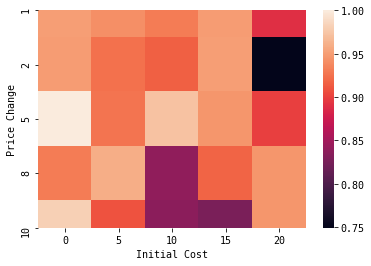

In [18]:
datamap = pd.DataFrame([(price_change, initial_cost, 
                         np.mean(df[(df['Initial cost'] == initial_cost) & 
                                    (df['Price Change'] == price_change)]['Percent Total Money']))
    for initial_cost in df['Initial cost'].unique()
    for price_change in df['Price Change'].unique()
], columns=['Price Change', 'Initial Cost', 'Value']).pivot('Price Change', 'Initial Cost', 'Value')
g = sns.heatmap(datamap)
save_plot(analysis_filename('all', 'money_heat'), "iterative_round", image_formats=[ImageFormat.PNG, ImageFormat.EPS])
g